In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bollywood_data=pd.read_csv("bollywood.csv")
bollywood_data.head(10)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,MatruKiBijleeKaMandola,N,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,DedhIshqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1


In [4]:
print(bollywood_data.shape)
print(bollywood_data.info())

(149, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [14]:
movies_by_genre=bollywood_data.value_counts("Genre")
print(movies_by_genre.sort_values(axis=0,ascending=False))

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64


In [23]:
genre_release_time=pd.crosstab(index=bollywood_data["Genre"],columns=bollywood_data["ReleaseTime"])
genre_release_time

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [25]:
movie_releases_by_month=bollywood_data.value_counts("ReleaseDate")
print(movie_releases_by_month)

ReleaseDate
9-May-14     5
18-Jul-14    3
15-Mar-13    3
25-Apr-14    3
26-Jul-13    3
            ..
7-Nov-14     1
8-Mar-13     1
8-Nov-13     1
9-Aug-13     1
9-Jan-15     1
Name: count, Length: 102, dtype: int64


In [33]:
bollywood_data["ReleaseDate"]=pd.to_datetime(bollywood_data["ReleaseDate"])
bollywood_data["Month Name"]=bollywood_data["ReleaseDate"].dt.month_name()

In [34]:
bollywood_data

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Name
0,1,2014-04-18,2States,LW,Romance,36,104.00,8576361,26622,2527,April
1,2,2013-01-04,TableNo.21,N,Thriller,10,12.00,1087320,1129,137,January
2,3,2014-07-18,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54,July
3,4,2013-01-04,RajdhaniExpress,N,Drama,7,0.35,42626,86,19,January
4,5,2014-07-04,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224,July
...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615,February
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,March
146,147,2015-03-20,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807,March
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,March


In [35]:
movie_releases_by_month=bollywood_data.value_counts("Month Name")
print(movie_releases_by_month)

Month Name
January      20
March        19
May          18
February     16
July         16
April        11
June         10
November     10
September    10
October       9
August        8
December      2
Name: count, dtype: int64


In [39]:
high_budget_movies=bollywood_data[bollywood_data["Budget"]>25]
high_budget_movies

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Name
0,1,2014-04-18,2States,LW,Romance,36,104.0,8576361,26622,2527,April
6,7,2014-09-19,Daawat-E-Ishq,N,Comedy,30,24.6,3905050,8315,1373,September
7,8,2013-01-11,MatruKiBijleeKaMandola,N,Comedy,33,40.0,2435283,4326,647,January
8,9,2014-01-10,DedhIshqiya,LW,Comedy,31,27.0,2333067,2436,591,January
10,11,2014-03-28,Dishkiyaoon,N,Action,28,6.0,2397647,3308,465,March
...,...,...,...,...,...,...,...,...,...,...,...
138,139,2015-01-23,Baby,N,Action,60,125.0,7968156,29246,2426,January
141,142,2015-02-06,Shamitabh,N,Drama,40,38.0,2105508,5599,677,February
142,143,2015-02-13,Roy,FS,Romance,40,58.0,7687797,18974,3229,February
146,147,2015-03-20,DilliwaliZaalimGirlfriend,N,Comedy,32,12.0,2316047,4289,807,March


In [40]:
high_budget_movies_by_month=high_budget_movies.value_counts("Month Name")
high_budget_movies_by_month

Month Name
February     9
August       7
July         6
January      6
March        6
November     6
June         5
April        4
September    4
October      4
May          3
December     2
Name: count, dtype: int64

In [42]:
return_on_investment=(bollywood_data["BoxOfficeCollection"]-bollywood_data["Budget"])/bollywood_data["Budget"]
bollywood_data["ROI"]=return_on_investment

In [43]:
bollywood_data

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Name,ROI
0,1,2014-04-18,2States,LW,Romance,36,104.00,8576361,26622,2527,April,1.888889
1,2,2013-01-04,TableNo.21,N,Thriller,10,12.00,1087320,1129,137,January,0.200000
2,3,2014-07-18,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54,July,-0.600000
3,4,2013-01-04,RajdhaniExpress,N,Drama,7,0.35,42626,86,19,January,-0.950000
4,5,2014-07-04,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224,July,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615,February,1.000000
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,March,1.469231
146,147,2015-03-20,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807,March,-0.625000
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,March,1.378000


In [49]:
data_by_roi=bollywood_data[["MovieName","ROI"]]
data_by_roi

,MovieName,ROI
0,2States,1.888889
1,TableNo.21,0.200000
2,AmitSahniKiList,-0.600000
3,RajdhaniExpress,-0.950000
4,BobbyJasoos,-0.400000
...,...,...
144,DumLagaKeHaisha,1.000000
145,NH10,1.469231
146,DilliwaliZaalimGirlfriend,-0.625000
147,Hunterrr,1.378000


In [52]:
data_by_roi.sort_values(by="ROI",ascending=False)

,MovieName,ROI
64,Aashiqui2,8.166667
89,PK,7.647059
132,GrandMasti,7.514286
135,TheLunchbox,7.500000
87,Fukrey,6.240000
...,...,...
49,KyaDilliKyaLahore,-0.928571
3,RajdhaniExpress,-0.950000
53,SonaSpa,-0.976000
15,Bandook,-0.977500


In [55]:
roi_by_release_time=bollywood_data.groupby("ReleaseTime")["ROI"].mean()
roi_by_release_time

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

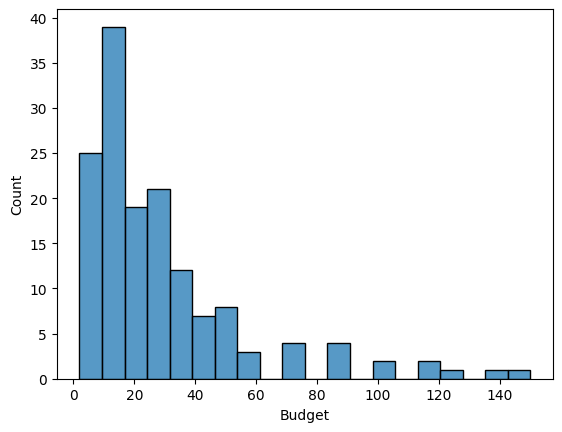

In [60]:
sns.histplot(data=bollywood_data,x="Budget",bins=20)
plt.show()

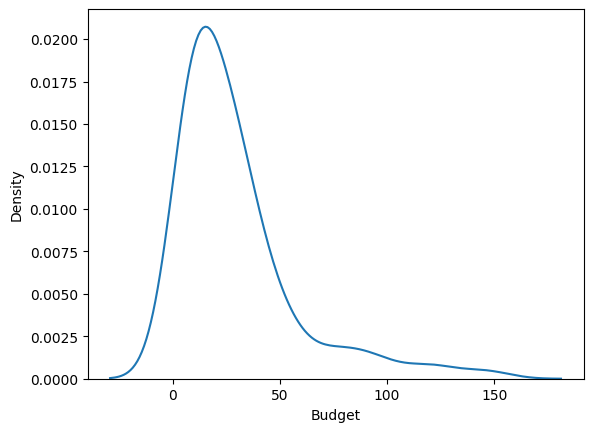

In [61]:
sns.kdeplot(bollywood_data["Budget"])
plt.show()

In [67]:
movies_with_comedy_drama=bollywood_data[bollywood_data["Genre"].isin(["Comedy","Drama"])]
movies_with_comedy_drama

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month Name,ROI
2,3,2014-07-18,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54,July,-0.600
3,4,2013-01-04,RajdhaniExpress,N,Drama,7,0.35,42626,86,19,January,-0.950
4,5,2014-07-04,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224,July,-0.400
5,6,2014-05-30,Citylights,HS,Drama,7,35.00,1076591,1806,84,May,4.000
6,7,2014-09-19,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,September,-0.180
...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,2015-01-30,Hawaizaada,N,Drama,25,30.25,2368404,8619,539,January,0.210
141,142,2015-02-06,Shamitabh,N,Drama,40,38.00,2105508,5599,677,February,-0.050
144,145,2015-02-27,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615,February,1.000
146,147,2015-03-20,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807,March,-0.625


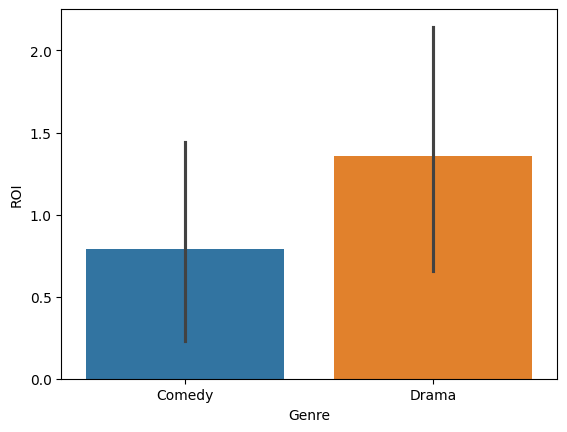

In [68]:
sns.barplot(data=movies_with_comedy_drama,x="Genre",y="ROI",hue="Genre")
plt.show()

In [69]:
influential_features=["BoxOfficeCollection","YoutubeViews","YoutubeLikes"]
correlation=bollywood_data[influential_features].corr()
correlation

,BoxOfficeCollection,YoutubeViews,YoutubeLikes
BoxOfficeCollection,1.000000,0.588632,0.682517
YoutubeViews,0.588632,1.000000,0.884055
YoutubeLikes,0.682517,0.884055,1.000000


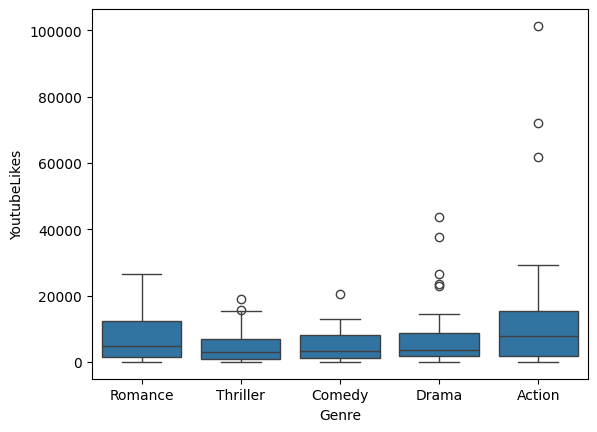

In [70]:
sns.boxplot(data=bollywood_data,x="Genre",y="YoutubeLikes")
plt.show()

In [72]:
influential_features=["BoxOfficeCollection", "YoutubeViews", "YoutubeLikes","YoutubeDislikes"]

correlation=bollywood_data[influential_features].corr()
correlation

,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
BoxOfficeCollection,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.623941,0.846739,0.859730,1.000000


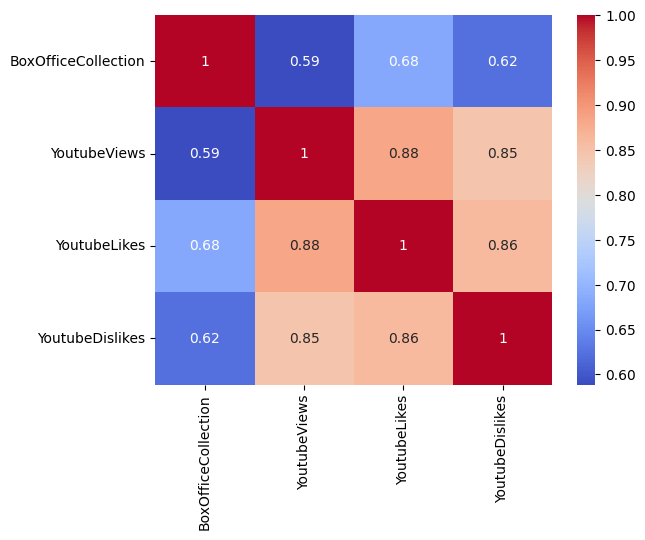

In [76]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()